# **_Titanic - Machine Learning_**

## _목차_ 
### •Importing Data  
### •Data Preprocessing
### •Feature Scaling 
### •Modeling  
### •Hyperparameter Tuning  
### •Output  
### •Reference
  
  
  
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## _Importing Data_

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train = train_data.copy()
test = test_data.copy()

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### PassengerId는 후에 Kaggle에 제출할 때만 필요하므로 지금은 필요가 없다.

In [4]:
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)
pred = train_data['Survived']

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 결측값 확인

In [6]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

#### Age, Cabin, Fare, Embarked에 결측치가 있다.

## _Data Preprocessing_  
### Explanatory Data Analysis (EDA) & Feature Engineering

### 1. Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

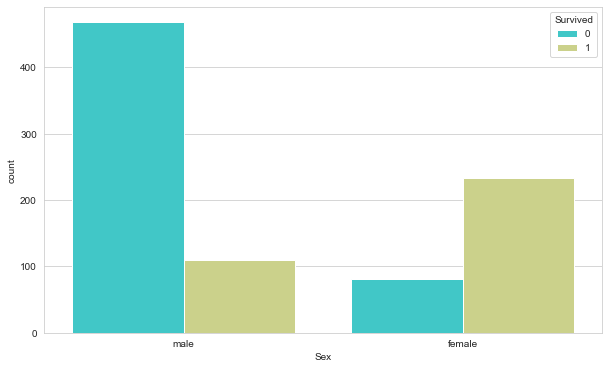

In [8]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'Sex',hue='Survived',data=train_data,palette='rainbow')

#### Sex는 categorical 변수로 numerical 변수로 바꿔줄 필요가 있다.

In [9]:
sex_train = pd.get_dummies(train['Sex'])
sex_test = pd.get_dummies(test['Sex'])

train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

train = pd.concat([train,sex_train],axis=1)
test = pd.concat([test,sex_test],axis=1)

In [10]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


#### male변수가 0인 경우 female임을 뜻하므로 female변수는 redundant하다. 따라서 female은 빼준다.

In [11]:
train.drop(['female'],axis=1,inplace=True)
test.drop(['female'],axis=1,inplace=True)

### 2. Pclass

#### Pclass는 티켓 등급이다.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

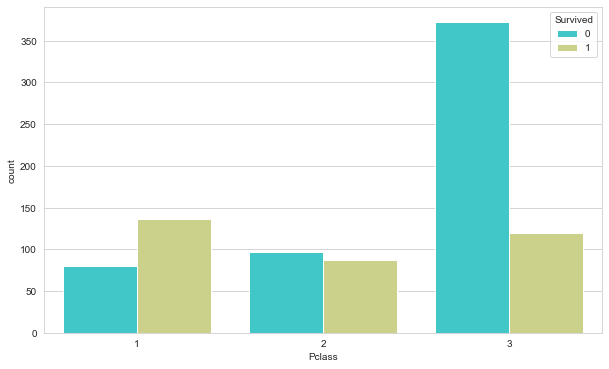

In [12]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'Pclass',hue='Survived',data=train,palette='rainbow')

#### 1등급 승객의 사망 확률은 생존 확률보다 낮다. 반면에 3등급 승객의 사망 확률은 생존 확률보다 압도적으로 높다.

### 3. Name

#### Name변수는 Title이라는 중요한 정보를 제공한다. Title에는 성별은 물론 나이와 관련된 정보도 있기 때문이다. 우선 Name에서 Title을 추출해보자.

In [13]:
#이름에서 칭호를 분리하기
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
print('train:',train['Title'].value_counts(), '\ntest:',test['Title'].value_counts(), sep='\n')

train:
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Jonkheer      1
Ms            1
Mme           1
Sir           1
Lady          1
Countess      1
Capt          1
Name: Title, dtype: int64

test:
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


#### Title들을 정리해보자  
Mr는 일반 성인 남성  /  Master는 18세 미만 남성  /  Mrs는 기혼 여성  /  Miss는 미혼 여성  /  Dr는 박사학위를 딴 사람이다.  /  Rev는 신부님이나 목사님을 칭한다.  /  Major는 군대에서 쓰는 계급이다.  /  Col도 마찬가지로 군대에서 쓰는 계급이다.  /  Mlle은 mademoiselle을 뜻하며 이는 Miss의 프랑스어 버전이다.  /  Ms는 여성을 뜻하나 Miss와 Mrs처럼 혼인여부를 알려주지 않는다.  /  Don은 주로 라틴어계쪽에서 쓰이는 권위있는 남성의 존칭이다.  /  Dona는 여성의 존칭이다.  /  Sir는 기사작위를 받은 남성을 뜻한다.  /  Lady는 영국에서는 귀족 여성에게 주어진 칭호이다.  /  Mme는 madame을 뜻하며 이는 Mrs의 프랑스어 버전이다.  /  Capt는 선장을 뜻한다.  /  Countess는 백작 부인을 뜻한다.  /  Jonkheer는 귀족 내에서 가장 낮은 직급이다.  
  
여기서 Title의 모든 원소를 사용하는 것은 매우 비효율적으로 보인다. 왜냐하면 몇몇 칭호들은 극소수들만이 갖고 있기 때문이다. 따라서 이들 중 몇 개는 묶어줄 필요가 있어 보인다. 그 기준을 우선 성별로 나누어주는 것이 가장 효과적으로 보인다. 왜냐하면 성별에 따른 생존 가능성이 확연히 다르기 때문이다. 그리고 Master는 나이에 대한 정보를 주기 때문에 남겨둔다.  
    
그래서 Ms(Miss, Mrs, Mlle, Mme), Rare(귀족이나 희귀:'Lady'희 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona')라는 새로운 category를 만든다.  
    
#### 결론적으로 Master, Ms, Mr, Rare로 묶어줄 것이다.

In [14]:
# Master: 0, Ms: 1, Mr: 2, Rare: 3

title_mapping = {"Mr": 2, "Miss": 1, "Mrs": 1, 
                 "Master": 0, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 1,"Countess": 3,
                 "Ms": 1, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 1,"Capt": 3,"Sir": 3}

train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

<AxesSubplot:xlabel='Title', ylabel='count'>

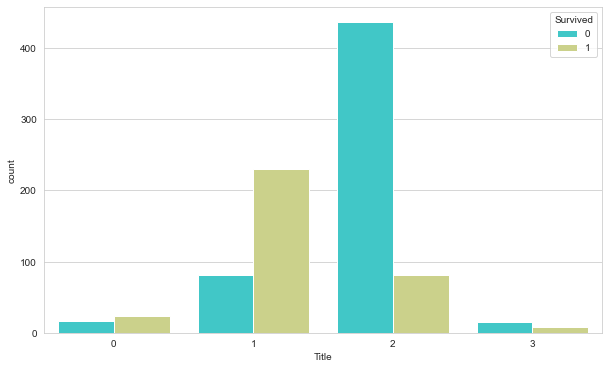

In [15]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'Title',hue='Survived',data=train,palette='rainbow')

#### Title이 Mr인 승객의 사망 확률이 압도적으로 높다. Title이 Ms인 승객은 생존 확률이 더 높다.

#### 이제 Name은 필요가 없어 보이므로 빼주려고 한다.

In [16]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### 4. Age

#### Age 변수는 결측값이 많았다.

In [17]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 결측값을 위 표에서 Age의 median인 50%의 값을 넣어주려고 한다.

In [18]:
train["Age"].fillna(train['Age'].describe().loc[['50%']][0], inplace = True) 
test["Age"].fillna(test['Age'].describe().loc[['50%']][0], inplace = True) 

In [19]:
# 잘 채워졌는지 확인
print(train.isnull().sum(), test.isnull().sum(),sep='\n')

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
male          0
Title         0
dtype: int64
Pclass        0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
male          0
Title         0
dtype: int64


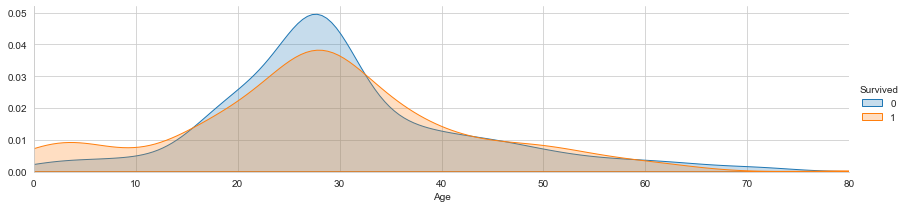

In [20]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

#### 이 그래프를 보면 나이에 따라서 사망률이 더 높은 구간도 있고 더 낮은 구간도 있는 것을 볼 수 있다.

### 5. Fare

#### Fare는 Test 데이터셋에서만 결측값이 있었다. Fare도 마찬가지로 median값을 넣어주려고 한다.

In [21]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [22]:
test["Fare"].fillna(test['Fare'].describe().loc[['50%']][0], inplace = True) 

In [23]:
# 잘 채워졌는지 확인
print(test.isnull().sum())

Pclass        0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
male          0
Title         0
dtype: int64


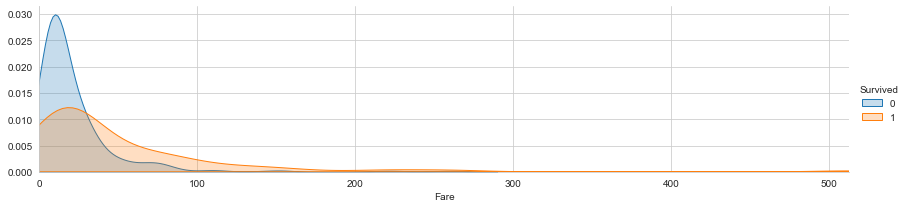

In [24]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

#### Fare에 따라 사망률이 변하는 것을 볼 수 있다.

### 6. Embarked

#### Embarked 변수는 승객이 어느 항구에서 배를 탔는지를 알려주며 C = Cherbourg, Q = Queenstown, S = Southampton 가 있다.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

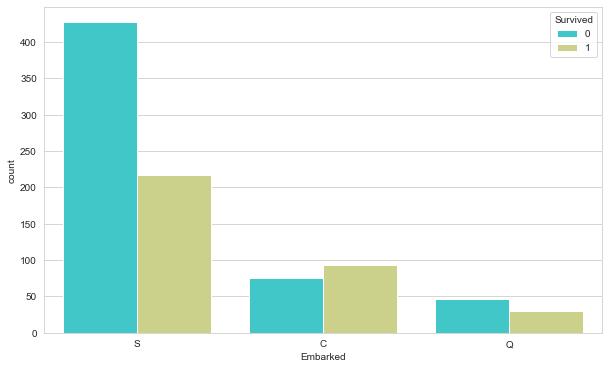

In [25]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked',hue='Survived',data=train_data, palette = 'rainbow')

#### Southampton에서 탄 승객들의 사망률이 매우 높다. 반면에 Cherbourg에서 탄 승객들의 사망률은 생존률보다 낮다.

#### Embarked도 마찬가지로 결측값이 있다. 하지만 승객이 어느 항구에서 탔을 지 유추해볼 만한 정보가 별로 없으므로 가장 빈도수가 높은 'S'로 결측값을 채워주려고 한다.

In [26]:
train["Embarked"].fillna("S", inplace = True) 
test["Embarked"].fillna("S", inplace = True) 

#### Embarked는 categorical 변수로 numerical 변수로 바꿔줄 필요가 있다.

In [27]:
embark_train = pd.get_dummies(train['Embarked'])
embark_test = pd.get_dummies(test['Embarked'])

train.drop('Embarked',axis=1,inplace=True)
test.drop('Embarked',axis=1,inplace=True)

train = pd.concat([train,embark_train],axis=1)
test = pd.concat([test,embark_test],axis=1)

### 7. SibSp & Parch

#### SibSp는 승객의 siblings와 spouse의 수를 나타낸다.  
#### Parch는 승객의 parents와 children의 수를 나타낸다.

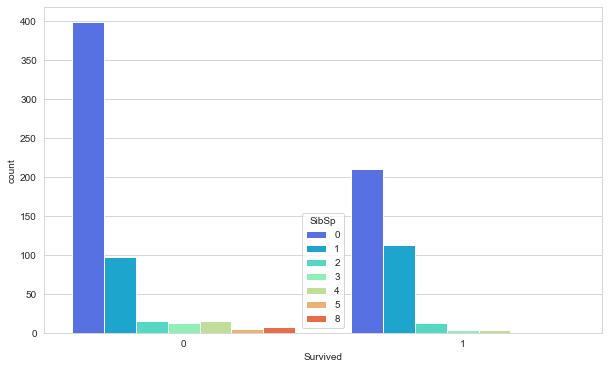

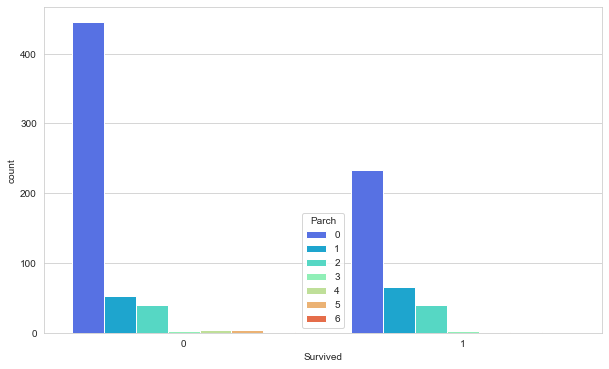

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='SibSp', data=train, palette = 'rainbow')

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Parch', data=train, palette = 'rainbow')

plt.show()

#### 위 그래프들을 보면 승객이 혼자인 경우 사망률이 매우 높은 것을 볼 수 있다.

#### SibSp와 Parch를 통해 승객의 같이 탑승한 가족의 수라는 새로운 변수를 만들 수 있다. 그리고 이 수가 만약 0이면 혼자 탔다는 것을 의미한다.

In [29]:
def family(x):
    if  (x['SibSp'] + x['Parch'])  > 0:
        return 1
    else:
        return 0

train['Family_Size'] = train.apply(family, axis = 1)
test['Family_Size'] = test.apply(family, axis = 1)

#### Family_Size라는 변수를 만듦으로써 SibSp와 Parch는 redundant한 정보이므로 이들을 빼준다.

In [30]:
train = train.drop(['SibSp','Parch'],axis=1)
test = test.drop(['SibSp','Parch'],axis=1)

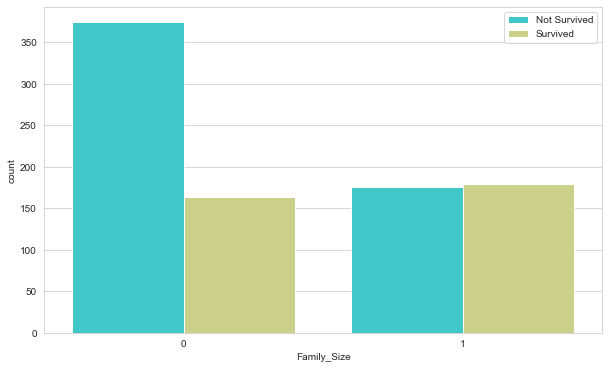

In [31]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'Family_Size',hue='Survived',data=train, palette='rainbow')
plt.legend(('Not Survived','Survived'))

#### 이 그래프가 혼자 탑승한 승객의 사망률을 더 명확하게 보여준다.

### 8. Cabin

#### Cabin은 결측치가 너무 많아서 이들을 어떻게 유추해줘야 할지 모르겠어서 빼려고 한다.

In [32]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [33]:
train.head()

,Survived,Pclass,Age,Ticket,Fare,male,Title,C,Q,S,Family_Size
0,0,3,22.0,A/5 21171,7.2500,1,2,0,0,1,1
1,1,1,38.0,PC 17599,71.2833,0,1,1,0,0,1
2,1,3,26.0,STON/O2. 3101282,7.9250,0,1,0,0,1,0
3,1,1,35.0,113803,53.1000,0,1,0,0,1,1
4,0,3,35.0,373450,8.0500,1,2,0,0,1,0


### 9. Ticket

#### 이 파트는 [Titanic - Top 4% , Hyperparameter Tuning](https://www.kaggle.com/tanmayunhale/titanic-top-4-hyperparameter-tuning) 이분의 코딩을 전적으로 따랐다.

#### Ticket을 보면 Ticket Prefix와 Ticket Number로 나눌 수 있다. 여기서 Ticket Prefix를 추출할 것이다.

In [34]:
Ticket_train = []
for i in list(train.Ticket):
    if not i.isdigit() :
        Ticket_train.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Ticket Prefix 추출
    else:
        Ticket_train.append("X")
train["Ticket"] = Ticket_train

Ticket_test = []
for j in list(test.Ticket):
    if not j.isdigit() :
        Ticket_test.append(j.replace(".","").replace("/","").strip().split(' ')[0]) #Ticket Prefix 추출
    else:
        Ticket_test.append("X")
test["Ticket"] = Ticket_test

In [35]:
train["Ticket"].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [36]:
test["Ticket"].unique()

array(['X', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5', 'SCAH',
       'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC',
       'SCParis', 'LP', 'AQ3'], dtype=object)

#### 여기서 문제는 train과 test셋이 몇몇의 서로 다른 Ticket Prefix를 가지고 있다.

In [37]:
 np.union1d(train["Ticket"], test["Ticket"])

array(['A', 'A4', 'A5', 'AQ3', 'AQ4', 'AS', 'C', 'CA', 'CASOTON', 'FC',
       'FCC', 'Fa', 'LINE', 'LP', 'PC', 'PP', 'PPP', 'SC', 'SCA3', 'SCA4',
       'SCAH', 'SCOW', 'SCPARIS', 'SCParis', 'SOC', 'SOP', 'SOPP',
       'SOTONO2', 'SOTONOQ', 'SP', 'STONO', 'STONO2', 'STONOQ', 'SWPP',
       'WC', 'WEP', 'X'], dtype=object)

#### 이것들이 두 셋에서 공유하는 Ticket Prefix들이다.

In [38]:
train= pd.get_dummies(train, columns = ["Ticket"], prefix="T")
test = pd.get_dummies(test, columns = ["Ticket"], prefix="T")

#### 이 두 셋들은 열의 수가 같아야하기 때문에 같이 공유하지 않는 Ticket Prefix들은 빼주려고 한다.

In [39]:
train = train.drop(['T_SP','T_SOP','T_Fa','T_LINE','T_SWPP','T_SCOW','T_PPP','T_AS','T_CASOTON'],axis = 1)
test = test.drop(['T_SCA3','T_STONOQ','T_AQ4','T_A','T_LP','T_AQ3'],axis = 1)

In [40]:
train.drop('Survived',axis=1,inplace=True)

#### Data Preprocessing 단계를 마치고 난 후의 train 데이터셋

In [41]:
train.head()

,Pclass,Age,Fare,male,Title,C,Q,S,Family_Size,T_A4,...,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_WC,T_WEP,T_X
0,3,22.0,7.2500,1,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,35.0,53.1000,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,8.0500,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## _Feature Scaling_

#### Standardization을 통해 데이터를 scaling시킨다.

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_scaled = sc.fit_transform(train)
test_scaled = sc.transform(test)

## _Modeling_

#### 여러 classifiers를 이용해 모델을 training한 후 정확도가 가장 높은 classifier를 고르려고 한다.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

KFold_Score = pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
               'RandomForestClassifier', 'AdaBoostClassifier', 
               'XGBoostClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          xgb.XGBClassifier(n_estimators=100,verbosity = 0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)
         ]
j = 0
for model in models:
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]] = cross_val_score(model, train, np.ravel(pred), scoring = 'accuracy', cv=cv)
    j = j+1

#### 5-겹 교차검증을 통해 구한 각 classifiers의 정확도의 평균을 내림차순으로 출력하려고 한다.

In [44]:
mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.854749,0.825843,0.831461,0.831461,0.825843,0.833871
XGBoostClassifier,0.854749,0.792135,0.848315,0.803371,0.792135,0.818141
GradientBoostingClassifier,0.815642,0.797753,0.837079,0.825843,0.808989,0.817061
LogisticRegression,0.810056,0.792135,0.814607,0.792135,0.820225,0.805831
AdaBoostClassifier,0.798883,0.786517,0.803371,0.786517,0.825843,0.800226
Linear SVM,0.787709,0.769663,0.792135,0.786517,0.803371,0.787879
KNeighborsClassifier,0.759777,0.674157,0.707865,0.685393,0.702247,0.705888
Radial SVM,0.715084,0.634831,0.724719,0.679775,0.606742,0.672230


#### RandomForestClassifer가 평균적으로 가장 높은 정확도를 주었다.

## _Hyperparameter Tuning_

#### RandomForestClassifier로 최선의 정확도를 도출해줄 hyperparameter를 GridSearchCv를 이용해 구하려고 한다.

In [45]:
rfc = RandomForestClassifier(random_state=0)

In [46]:
rf_param_grid = { 
    'n_estimators': [200,300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['gini','entropy']
}

#### 여기서도 5겹-교차검증을 이용한다.

In [47]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=rf_param_grid, cv= 5)
CV_rfc.fit(train_scaled,pred)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

#### 이 GridSearchCV를 통해 얻은 hyperparameter를 쓰려고 한다.

In [48]:
rfc_nice=RandomForestClassifier(random_state=0, n_estimators= 200, criterion = 'entropy',
                                max_features = 'auto',max_depth = 8)
rfc_nice.fit(train_scaled, pred)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=0)

#### 참고로 Kaggle에선 criterion='gini'를 이용한 결과가 더 높은 정확도를 보인다.

In [49]:
pred_test = rfc_nice.predict(test_scaled)

## _Output_

#### Kaggle 제출용 형식 맞추기

In [50]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_test})
output.to_csv('submission.csv', index=False)

In [51]:
#확인해보자
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## _Reference_

#### •[Titanic: Machine Learning from Disaster](https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb)  
#### •[Titanic - Top 4% , Hyperparameter Tuning ](https://www.kaggle.com/tanmayunhale/titanic-top-4-hyperparameter-tuning)